In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('world_population.csv')

In [3]:
raw_data.head(5)

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [4]:
raw_data.describe()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
count,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000
mean,1985.500000,5.002010e+09,1.616429,7.511954e+07,33.557143,2.226815e+09,42.200000
std,20.351085,1.594877e+09,0.321288,1.256972e+07,10.723989,1.070191e+09,7.447595
min,1951.000000,2.584034e+09,1.050000,4.674740e+07,17.000000,7.750677e+08,30.000000
25%,1968.250000,3.570120e+09,1.262500,7.314225e+07,24.000000,1.294408e+09,36.000000
50%,1985.500000,4.915745e+09,1.770000,7.942852e+07,33.000000,2.035272e+09,41.500000
75%,2002.750000,6.361332e+09,1.847500,8.356683e+07,42.750000,3.054260e+09,48.000000
max,2020.000000,7.794799e+09,2.090000,9.290386e+07,52.000000,4.378994e+09,56.000000


In [5]:
raw_data.isnull().sum()

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

In [6]:
import seaborn as sns

In [7]:
population_correlation = raw_data.corr()
print(population_correlation)

                Year  Population  ChangePerc  NetChange   Density     Urban  \
Year        1.000000    0.998403   -0.887211   0.797789  0.997915  0.987119   
Population  0.998403    1.000000   -0.907773   0.768659  0.999640  0.993085   
ChangePerc -0.887211   -0.907773    1.000000  -0.451671 -0.908100 -0.924174   
NetChange   0.797789    0.768659   -0.451671   1.000000  0.767797  0.706693   
Density     0.997915    0.999640   -0.908100   0.767797  1.000000  0.992816   
Urban       0.987119    0.993085   -0.924174   0.706693  0.992816  1.000000   
UrbanPerc   0.994349    0.995669   -0.899791   0.753161  0.995339  0.995454   

            UrbanPerc  
Year         0.994349  
Population   0.995669  
ChangePerc  -0.899791  
NetChange    0.753161  
Density      0.995339  
Urban        0.995454  
UrbanPerc    1.000000  


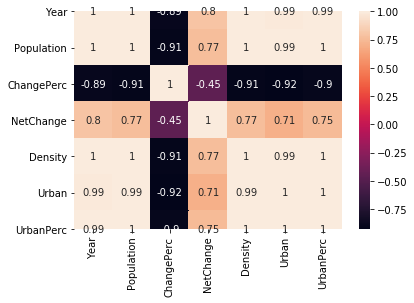

In [8]:
sns.heatmap(population_correlation, annot=True)

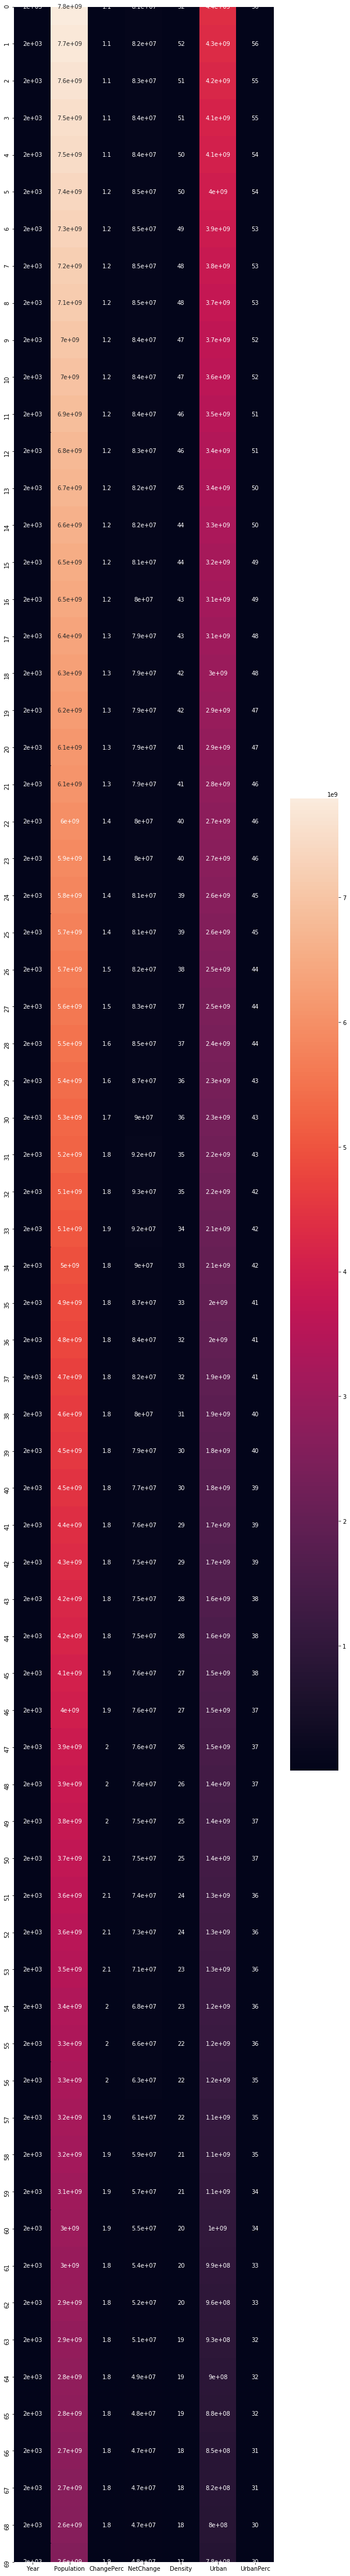

In [9]:
plt.figure(figsize=(10,200))
sns.heatmap(raw_data, annot=True, square=True)

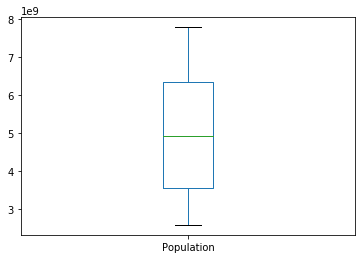

In [10]:
raw_data['Population'].plot.box()

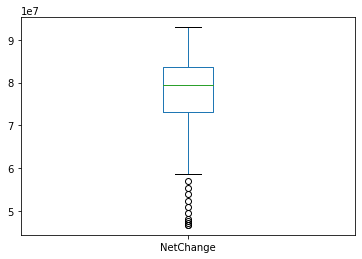

In [11]:
raw_data['NetChange'].plot.box()

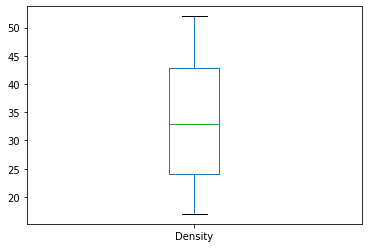

In [12]:
raw_data['Density'].plot.box()

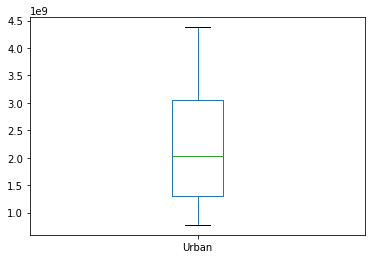

In [13]:
raw_data['Urban'].plot.box()

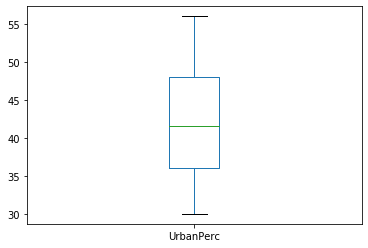

In [14]:
raw_data['UrbanPerc'].plot.box()

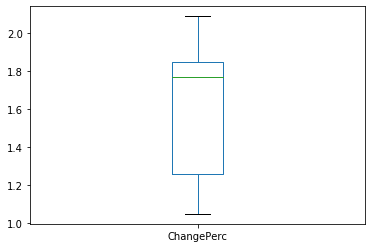

In [15]:
raw_data['ChangePerc'].plot.box()

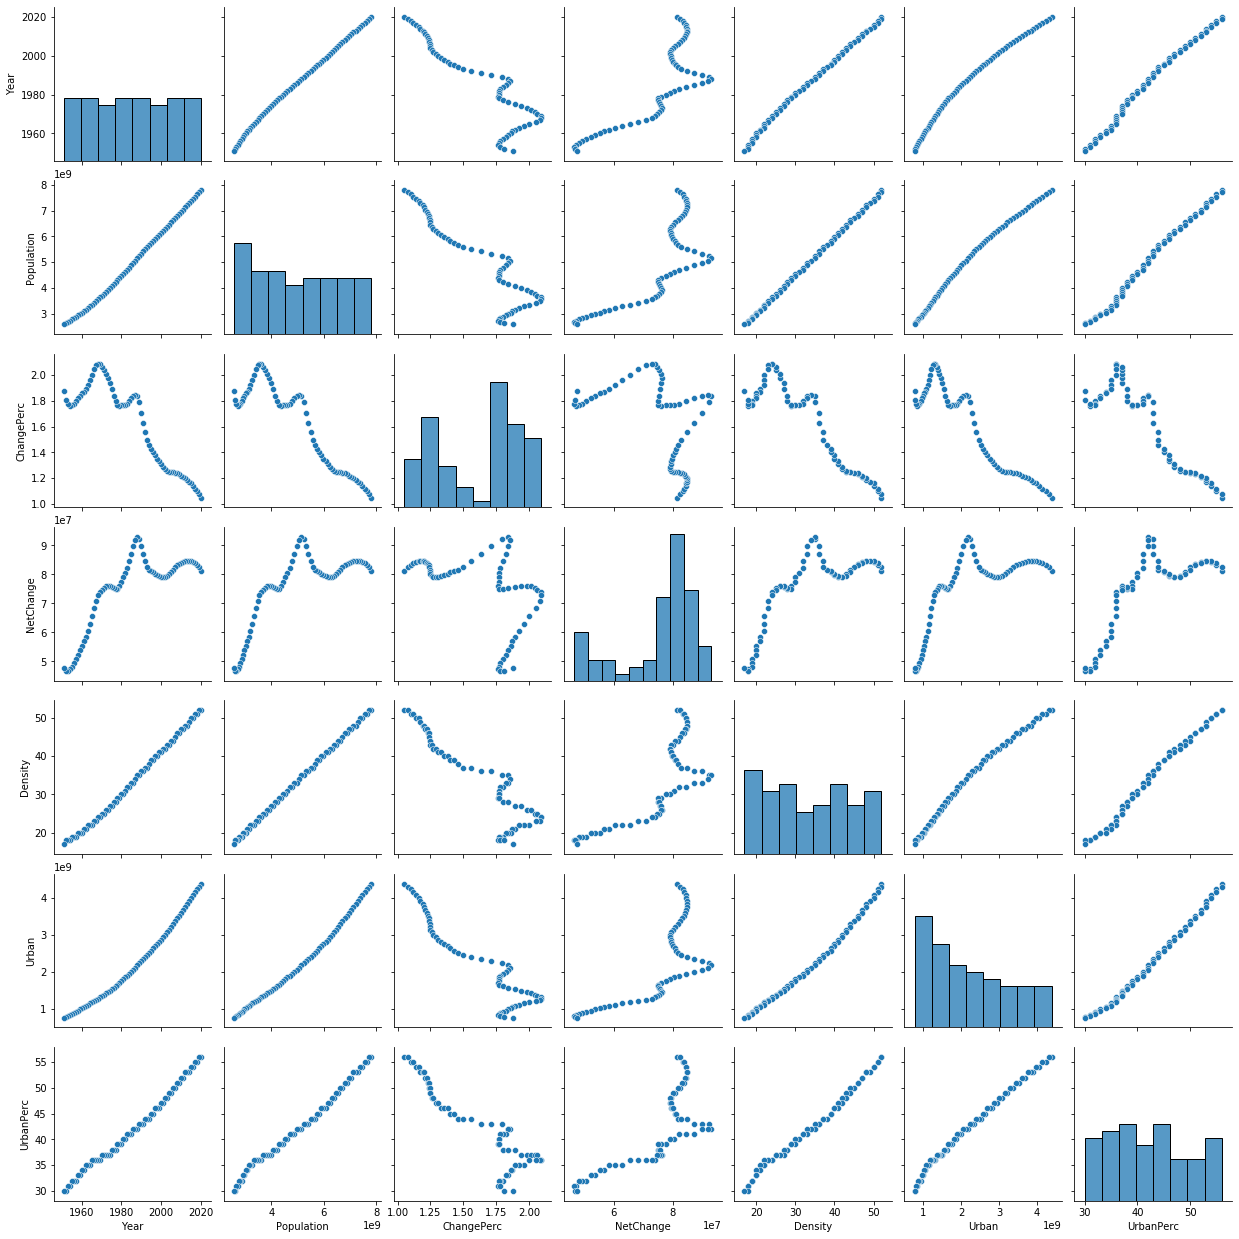

In [16]:
sns.pairplot(raw_data)

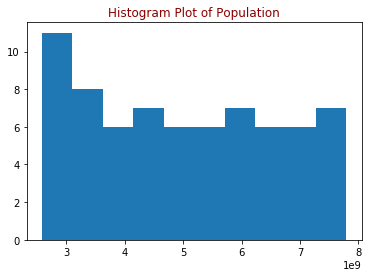

In [17]:
plt.hist(raw_data['Population'])
plt.title("Histogram Plot of Population", color='DarkRed')
plt.show()

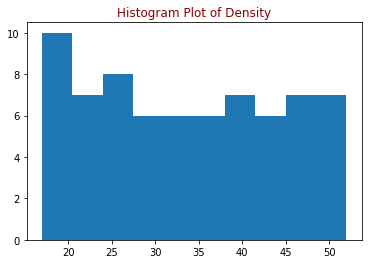

In [18]:
plt.hist(raw_data['Density'])
plt.title("Histogram Plot of Density", color='DarkRed')
plt.show()

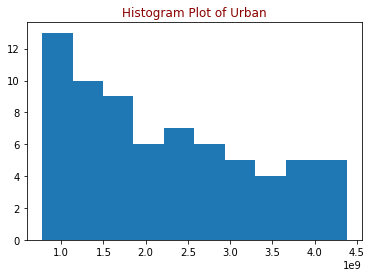

In [19]:
plt.hist(raw_data['Urban'])
plt.title("Histogram Plot of Urban", color='DarkRed')
plt.show()

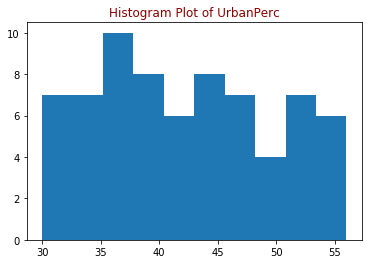

In [20]:
plt.hist(raw_data['UrbanPerc'])
plt.title("Histogram Plot of UrbanPerc", color='DarkRed')
plt.show()

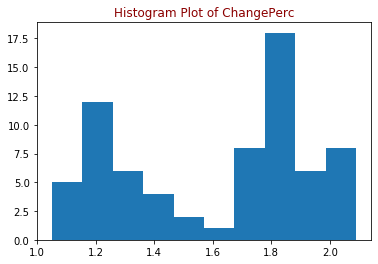

In [21]:
plt.hist(raw_data['ChangePerc'])
plt.title("Histogram Plot of ChangePerc", color='DarkRed')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X = raw_data.drop(['Population', 'NetChange'], axis=1)
X = pd.DataFrame(scale(X))
y = raw_data['Population']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [24]:
#setting up the models
models = [('LogReg', LogisticRegression(max_iter=1000)),
          ('LinReg', LinearRegression()),
         ('RF', RandomForestRegressor(n_estimators=20, random_state=0)),
         ('XGB', XGBRegressor())
         ]

In [26]:
RF = RandomForestRegressor(n_estimators=20)
RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
print('The accuracy using a random forest regressor is: ', accuracy)

The accuracy using a random forest regressor is:  0.9959486414783992


In [27]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
accuracy = LinReg.score(X_test, y_test)
print('The accuracy using a linear regressor is: ', accuracy)

The accuracy using a linear regressor is:  0.999054015122897


In [29]:
#predicting world popuation
y_pred = LinReg.predict(X_test)

#comparison with the predicted values

X_test_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [30]:
X_test_df

,Actual,Predicted
26,5663150427,5.655374e+09
27,5581597546,5.541579e+09
48,3851650245,3.860563e+09
22,5984793942,5.968347e+09
30,5327231061,5.294136e+09
51,3625680627,3.612472e+09
7,7210581976,7.187518e+09
59,3091843507,3.125532e+09
34,4960567912,4.911555e+09
69,2584034261,2.499972e+09
